# SAMueL-2 full production analysis

## Import packages

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
from utils.data_process import DataProcess
from utils.descriptive_stats import DescriptiveStatistics
from utils.pathway import Pathway
from utils.reporting import GlobalReport
from utils.thrombolysis_choice_model import ThrombolysisChoiceModel
from utils.thrombolysis_outcome_model import OutcomeModel

## Create data for models

See 'data' folder for processing of raw data.

In [2]:
data_processor = DataProcess(
    year_min=2019,
    year_max=2021,
    limit_to_ambo=False,
)

data_processor.run()

All rows: 185673, ML rows:66820, Fraction: 0.36


## Model Run

In [3]:
run_model = True

if run_model:
    # Descriptive statistics
    ds = DescriptiveStatistics()
    #ds.run()
    
    # Thrombolysis decision model
    thrombolysis_choice_model = ThrombolysisChoiceModel()
    #thrombolysis_choice_model.run()

    # Outcome model
    outcome_model = OutcomeModel()
    outcome_model.run()

    # Pathway simulation
    #
    # pathway = Pathway(
    #    data_processor.pathway_simulation_parameters,
    #    thrombolysis_choice_model.benchmark_thrombolysis,
    #    trials=100)
    #pathway.run()

Outcome multiclass ROC AUC 0.817


In [4]:
outcome_model.prototype_patients_outcomes_treated

array([[0.18137304, 0.59110916, 0.1496941 , 0.05000675, 0.01695468,
        0.00138768, 0.0094746 ],
       [0.11794579, 0.21638821, 0.23294674, 0.11839122, 0.13799684,
        0.02194662, 0.15438461],
       [0.10444915, 0.24535264, 0.2247926 , 0.12770537, 0.13489914,
        0.02375198, 0.13904911]], dtype=float32)

In [5]:
outcome_model.prototype_patients_outcomes_untreated


array([[0.16738479, 0.595887  , 0.15276945, 0.052619  , 0.01871839,
        0.00116446, 0.01145687],
       [0.08353525, 0.12467343, 0.18067048, 0.11613972, 0.170577  ,
        0.04428637, 0.28011772],
       [0.07813295, 0.14930464, 0.18414271, 0.13231601, 0.1761175 ,
        0.05062259, 0.2293636 ]], dtype=float32)

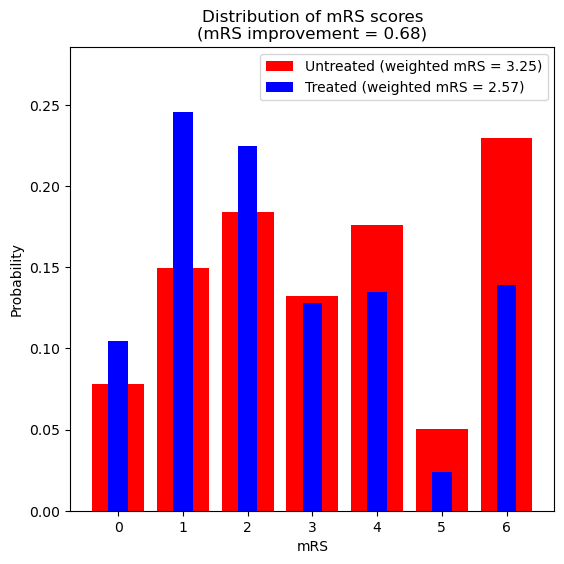

In [6]:
untreated = outcome_model.prototype_patients_outcomes_untreated[2,:]
treated = outcome_model.prototype_patients_outcomes_treated[2,:]
# Get weighted average of mRS scores
weighted_untreated = np.sum(untreated * np.arange(7))
weighted_treated = np.sum(treated * np.arange(7))
diff = weighted_treated - weighted_untreated

# Draw a dotted histogram of the untreated and treated distributions
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
x = np.arange(7)
ax.bar(x, untreated, color='red', label=f'Untreated (weighted mRS = {weighted_untreated:0.2f})', 
       linewidth=1, linestyle='--')
ax.bar(x, treated, color='blue', label=f'Treated (weighted mRS = {weighted_treated:0.2f})', linewidth=1, linestyle='--', width=0.3)
ax.legend()
ax.set_xlabel('mRS')
ax.set_ylabel('Probability')
ax.set_title(f'Distribution of mRS scores\n(mRS improvement = {-diff:.2f})')

# Set ylim to be 0.05 more than the maximum probability
ax.set_ylim(0, np.max([np.max(untreated), np.max(treated)]) + 0.04)


plt.tight_layout(pad=2)
plt.show()

## Reporting

In [7]:
report = GlobalReport()
report.create_report()

## To Do

* Restrict stroke units to minimum admissions and thrombolysis use (can currently crash with restricted data years)